# El problema de XOR resuelto con NN 

Los problemas de XOR y DONUT son problemas no lineales de **clasificación binaria** (una clase u otra).

En el caso de XOR, se ve que no hay una linea que pueda separar las 2 clases.

![Problema XOR](xor2.png)

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Este es un caso de clasificación binaria, entonces usaremos 2 sigmoides encadenadas.
def forward(X, W1, b1, W2, b2):
    # sigmoid
    Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))

    # tanh
    # Z = np.tanh(X.dot(W1) + b1)
    # relu
    #Z = X.dot(W1) + b1
    #Z = Z * (Z > 0)

    activation = Z.dot(W2) + b2
    
    Y = 1 / (1 + np.exp(-activation))
    
    return Y, Z

In [6]:
# Para la función 'predict' no es necesario usar softmax(), sino que usaremos solo el redondeo de la función forward()
def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)

In [9]:
# Derivadas para la actualizacion de pesos

def derivative_w2(Z, T, Y):
    # Z es (N, M)
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    return (T - Y).sum()

def derivative_w1(X, Z, T, Y, W2):
    dZ = np.outer(T-Y, W2) * Z * (1 - Z) # esta es para la activacion sigmoide
    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # esta es para la activacion tanh
    # dZ = np.outer(T-Y, W2) * (Z > 0) # esta es para la activacion relu 
    return X.T.dot(dZ)

def derivative_b1(Z, T, Y, W2):
    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation
    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation
    return dZ.sum(axis=0)

In [10]:
def cost(T, Y):
    # tot = 0
    # for n in xrange(len(T)):
    #     if T[n] == 1:
    #         tot += np.log(Y[n])
    #     else:
    #         tot += np.log(1 - Y[n])
    # return tot
    return np.sum(T*np.log(Y) + (1-T)*np.log(1-Y))

In [11]:
# Datos del problema XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

In [12]:
# Creamos una NN con 5 neuronas en la 1er capa y asignamos pesos random
W1 = np.random.randn(2, 5)
b1 = np.zeros(5)
W2 = np.random.randn(5)
b2 = 0
    
# variables utiles
LL = [] # guardamos registro del log likelihood
learning_rate = 1e-2
regularization = 0.                             # en este caso es 0
last_error_rate = None


In [14]:
# hacemos 30000 pasadas
for i in xrange(30000):
    pY, Z = forward(X, W1, b1, W2, b2)                  # hacemos el forward()
    ll = cost(Y, pY)                                    # calculamos el coste
    prediction = predict(X, W1, b1, W2, b2)             # hacemos la prediccion
    er = np.mean(prediction != Y)                       # calculamos el error
    
    if er != last_error_rate:                           # si el error es distinto al anterior
        last_error_rate = er                                # actualizo el last_error
        print "error rate:", er
        print "true:", Y
        print "pred:", prediction
    
    if LL and ll < LL[-1]:
        print "early exit"
        break
    
    LL.append(ll)                                       # actualizo la lista de log-likelihood
    
    W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)    # actualizo W2
    b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)       # actualizo el b2 
    W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)  # actualizo W1
    b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)     # actualizo b1
    
    if i % 1000 == 0:
        print ll


error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  1.  1.]
-2.77026473001
error rate: 0.75
true: [0 1 1 0]
pred: [ 1.  1.  0.  1.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  0.  1.  0.]
-2.76407901053
-2.75664169603
-2.74318480756
-2.71424648551
-2.64167493648
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
-2.4329842326
error rate: 0.0
true: [0 1 1 0]
pred: [ 0.  1.  1.  0.]
-1.87550220535
-1.09593453034
-0.625413201541
-0.407439119055
-0.294858564347
-0.228359699291
-0.185041583639
-0.154803317509
-0.132602288017
-0.115666469277
-0.102354690282
-0.0916370756183
-0.0828364576462
-0.0754902225395
-0.06927209208
-0.0639456514019
-0.05933559165
-0.0553092849447
-0.0517646189346
-0.0486217506114
-0.0458173859327
-0.0433007292719
-0.0410305621422


Ratio de Clasificacion final: 1.0


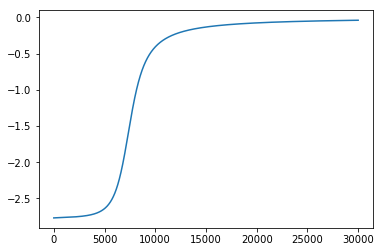

In [16]:
print "Ratio de Clasificacion final:", np.mean(prediction == Y)
plt.plot(LL)
plt.show()

Se ve que al final la NN resuelve el problema de clasificación no lineal con un ratio de clasificación del 100%.